In [42]:
import pandas as pd
file_path ='../data/chipotle.tsv'
chipo=pd.read_csv(file_path, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [5]:
#데이터 정보 살펴보기

In [6]:
print(chipo.shape)

(4622, 5)


In [7]:
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [4]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [44]:
#숫자적의미가 없는 것들은 int에서 str으로 바꾼다.
chipo['order_id']=chipo['order_id'].astype(str)
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [45]:
#unique 함수로 범주형 피처의 개수 출력하기 
print((chipo['order_id'].unique()))
print(len(chipo['order_id'].unique())) #갯수

['1' '2' '3' ... '1832' '1833' '1834']
1834


In [11]:
# 가장 많이 주문한 아이템 1- 10위 까지 뽑기
item_count = chipo['item_name'].value_counts()[:10]
print(item_count)

for i, (v, c) in enumerate(item_count.items(),1):
    print(i, "순위",':', v, c)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64
1 순위 : Chicken Bowl 726
2 순위 : Chicken Burrito 553
3 순위 : Chips and Guacamole 479
4 순위 : Steak Burrito 368
5 순위 : Canned Soft Drink 301
6 순위 : Steak Bowl 211
7 순위 : Chips 211
8 순위 : Bottled Water 162
9 순위 : Chicken Soft Tacos 115
10 순위 : Chips and Fresh Tomato Salsa 110


In [12]:
# 메뉴 당 주문 갯수 출력
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]


item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [13]:
# 메뉴 당 주문 총량
item_quan = chipo.groupby('item_name')['quantity'].sum()
item_quan[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [ ]:
# 메뉴별 주문 개수나 주문 총량을 시각화 한다

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
''' 메뉴 이름 리스트 변수 생성 - 시리즈를 리스트로 바꿔주고
x 축에 갯수를 넣어주면 1-50까지 번호가 메뉴 이름이 표시된다
Y 축에는 주문갯수 변수 생성(이것도 역시 리스트로 시리즈를 바꿔준다)
'''

In [16]:
item_name_list = item_quan.index.tolist()
print(item_name_list)

['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze', 'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl', 'Steak Burrito', 'Steak Crispy Tacos', 'Steak Salad', 'Steak Salad Bowl', 'Steak Soft Tacos', 'Veggie Bowl', 'Veggie Burrito', 'Veg

In [18]:
x_pos = np.arange(len(item_name_list))
y_pos = item_quan.values.tolist()

Text(0.5, 1.0, 'Distribute of all ordered item')

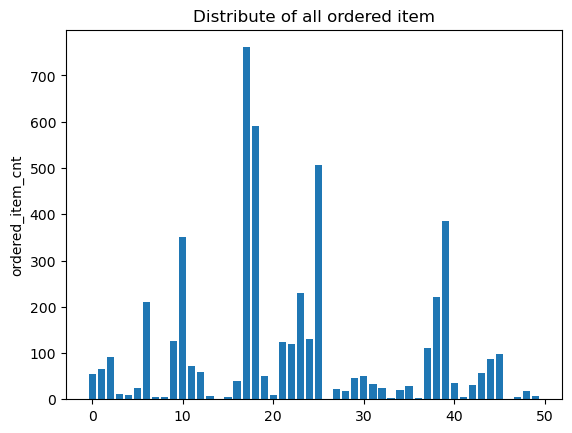

In [19]:
plt.bar(x_pos, y_pos, align ='center')
plt.ylabel('ordered_item_cnt')
plt.title('Distribute of all ordered item')

In [ ]:
# 데이터 전처리

In [20]:
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [31]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [46]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [47]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [ ]:
# 주문당 통계요약

In [48]:
chipo.groupby('order_id')['item_price'].sum().describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [37]:
chipo.groupby('order_id')['item_price'].describe()

,count,mean,std,min,25%,50%,75%,max
order_id,,,,,,,,
1,4.0,2.890000,0.577350,2.39,2.3900,2.890,3.3900,3.39
2,1.0,16.980000,NaN,16.98,16.9800,16.980,16.9800,16.98
3,2.0,6.335000,6.569022,1.69,4.0125,6.335,8.6575,10.98
4,2.0,10.500000,1.767767,9.25,9.8750,10.500,11.1250,11.75
5,2.0,6.850000,3.394113,4.45,5.6500,6.850,8.0500,9.25
...,...,...,...,...,...,...,...,...
1830,2.0,11.500000,0.353553,11.25,11.3750,11.500,11.6250,11.75
1831,3.0,4.300000,4.299128,1.50,1.8250,2.150,5.7000,9.25
1832,2.0,6.600000,3.040559,4.45,5.5250,6.600,7.6750,8.75


In [ ]:
# 30달러 이상 주문된 번호 출력하기 

In [54]:
chipo_orderid_group = chipo.groupby('order_id').sum()


C:\Users\Connie\AppData\Local\Temp\ipykernel_3640\413949326.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_orderid_group = chipo.groupby('order_id').sum()


In [56]:
chipo_orderid_group[300:500]

,quantity,item_price
order_id,,
1269,2,22.50
127,2,12.50
1270,2,20.50
1271,4,34.46
1272,2,13.20
...,...,...
1444,2,23.00
1445,2,13.37
1446,4,15.70


In [57]:
results = chipo_orderid_group[chipo_orderid_group.item_price >= 30]
print(results[:10])

          quantity  item_price
order_id                      
1006             8       71.40
1010             5       33.24
1013             4       31.90
1016             3       32.25
1026             4       31.70
103              6       47.90
1035             4       32.04
1051             7       59.35
1052             4       38.20
1057             3       31.25


In [ ]:
# 각 메뉴 가격은? 
'''메뉴의 가격이 나와있지 않기 때문에 토핑이 없는 메뉴를 가장 min으로 보고 
1개 주문 한 것 기준으로 그룹바이 진행'''

In [62]:
chipo_one_item=chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [ ]:
#메뉴별 가격 분포도

Text(0.5, 1.0, 'Distribution of Item Price')

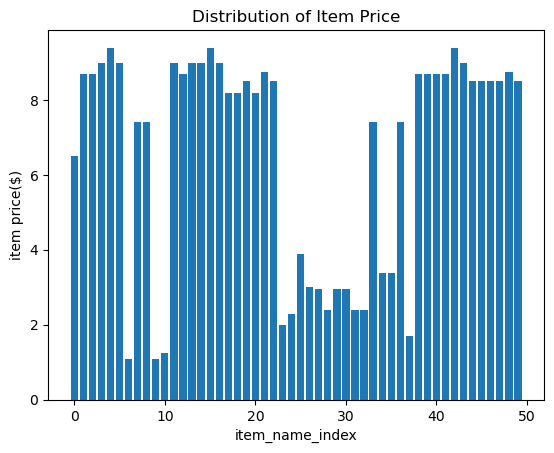

In [66]:
name_list = price_per_item.index.tolist()
x_pos = np.arange(len(name_list))
y_pos = price_per_item['item_price'].tolist()

plt.bar(x_pos,y_pos, align='center')
plt.ylabel('item price($)')
plt.xlabel('item_name_index')
plt.title('Distribution of Item Price')